In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement (2).csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in Lpa)')

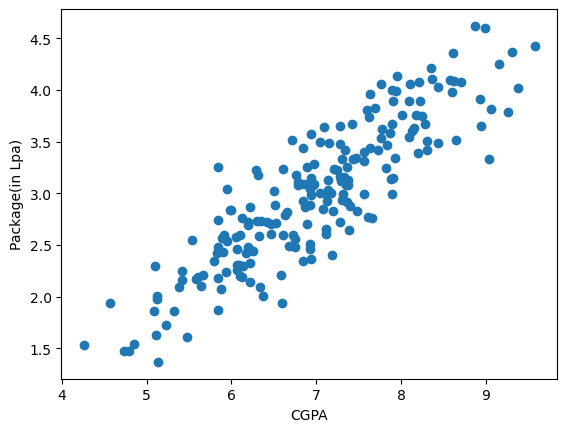

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in Lpa)')

In [6]:
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [7]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [8]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'package')

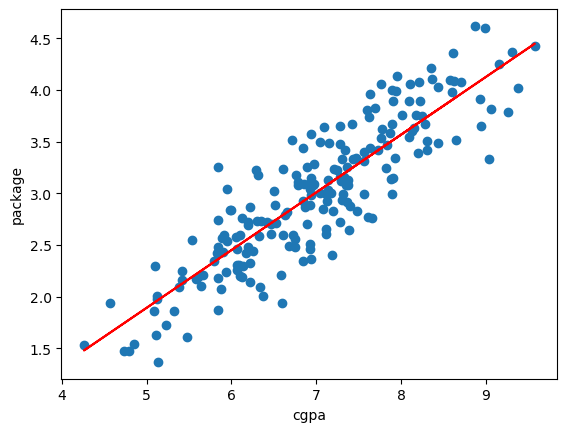

In [14]:
plt.scatter(x = df['cgpa'], y = df['package'])
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.xlabel('cgpa')

plt.ylabel('package')

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
y_pred = lr.predict(X_test)

In [19]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [20]:
print("Mean Absolute Error", mean_absolute_error(y_test, y_pred))

Mean Absolute Error 0.2884710931878175


In [21]:
print("Mean Squared Error", mean_squared_error(y_test, y_pred))

Mean Squared Error 0.12129235313495527


In [23]:
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.34827051717731616


In [24]:
print("R2_SCORE", r2_score(y_test, y_pred))

R2_SCORE 0.780730147510384


In [26]:
# Adjusted R2 score 
r2 = r2_score(y_test, y_pred)
X_test.shape

(40, 1)

In [28]:
print("Adjusted R2 Score", 1 - ((1-r2) * (40 - 1) / (40 - 1 - 1)))

Adjusted R2 Score 0.7749598882343415


In [29]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.796154,3.26
1,5.12,0.384321,1.98
2,7.82,0.614024,3.25
3,7.42,0.185916,3.67
4,6.94,0.323621,3.57


Text(0, 0.5, 'Package (in Lpa)')

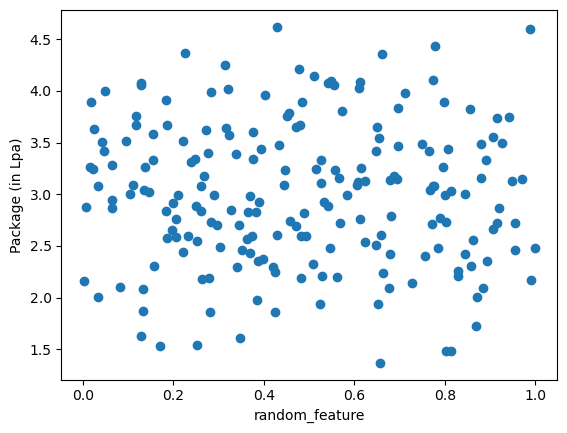

In [30]:
plt.scatter(x = new_df1['random_feature'], y = new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package (in Lpa)')

In [31]:
X = new_df1.iloc[:, 0:2]
y = new_df1.iloc[:, -1]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(X_test)

In [36]:
print("R2 score", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 score 0.7857476621108248


In [37]:
1 - ((1-r2) * (40 - 1) / (40 - 1 - 2))

0.7741664546573559

In [38]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12, 12, 200) / 10)

new_df2 = new_df2[['cgpa', 'iq', 'package']]

In [39]:
new_df2.sample(5)

,cgpa,iq,package
191,7.28,3.78,3.48
117,7.12,3.49,2.99
82,5.58,1.17,2.17
108,7.76,4.34,3.54
14,7.73,2.52,3.42


Text(0, 0.5, 'package in Lpa')

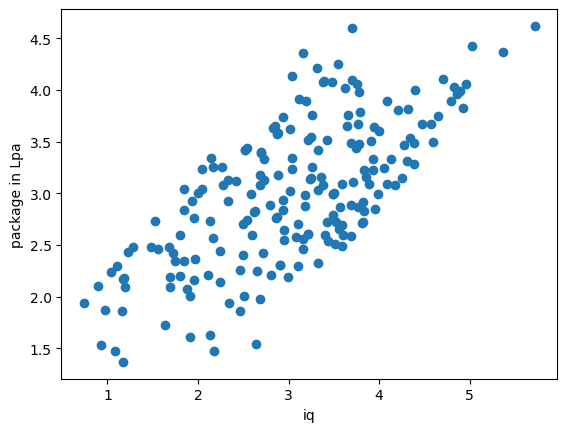

In [41]:
plt.scatter(x = new_df2['iq'], y = new_df2['package'])
plt.xlabel('iq')
plt.ylabel('package in Lpa')

In [43]:
np.random.randint(-100, 100)

69

In [44]:
X = new_df2.iloc[:, 0:2]
y = new_df2.iloc[:, -1]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [47]:
print("R2 score", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 score 0.8012360752667335


In [48]:
1 - ((1- r2) * (40 -1) / (40 - 1 - 2))

0.7904920793352055